In [1]:
import sys
sys.path.append("..")

from algorithms import *
from analysis_util.visualize import *
from analysis_util.cylcle_classifier import Cycle_Classifier
from classes.environment import Environment

import os

# Used for seed in np.random
Reproduce = 2023

In [2]:
Thetas = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]
Qs = [1 + 0.5*i for i in range(7)]
env = Environment()

In [21]:
np.random.seed(4)
pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L,pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t, Q1, Q2 =simulate_episode_Qlearning(env, Qs, Thetas)

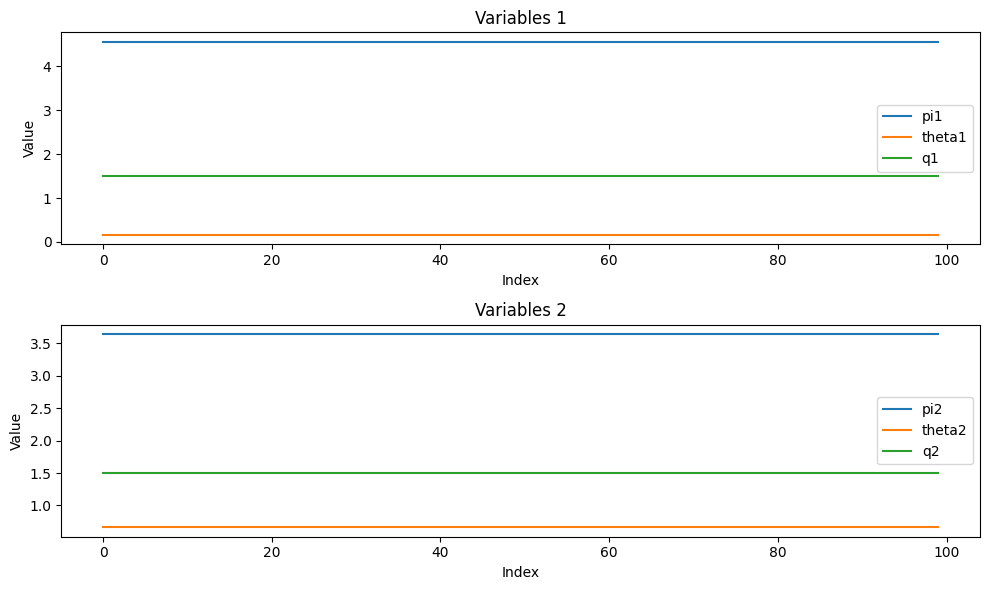

In [22]:
visualize_last_L(pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L)

In [25]:
np.mean(theta2_L)

0.6666666666666669

In [72]:
q1 = q1_L[-5:]
q2 = q2_L[-5:]
theta1 = theta1_L[-5:]
theta2 = theta2_L[-5:]
pi1_ep = pi1_L[-5:]
pi2_ep = pi2_L[-5:]

# Player 1 deviates
env = Environment()
action1 = Action(2, 0)
action2 = Action(q2_L[-1], theta2_L[-1])
pi1, pi2 = env.Pi(action1, action2)
q1.append(action1.q)
q2.append(action2.q)
theta1.append(action1.theta)
theta2.append(action2.theta)
pi1_ep.append(pi1)
pi2_ep.append(pi2)


# 20 episodes are played
for i in range(16):
    if i % 2:
        action1 = max(Q1[action2], key = Q1[action2].get)
    else:
        action2 = max(Q2[action1], key = Q2[action1].get)
    pi1, pi2 = env.Pi(action1, action2)
    q1.append(action1.q)
    q2.append(action2.q)
    theta1.append(action1.theta)
    theta2.append(action2.theta)
    pi1_ep.append(pi1)
    pi2_ep.append(pi2)


In [74]:
q1

[1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 2,
 2,
 1.5,
 1.5,
 2.5,
 2.5,
 2.0,
 2.0,
 3.0,
 3.0,
 2.5,
 2.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5]

C:\Users\woute\AppData\Local\Temp\ipykernel_140\2301450913.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, q1, 'go-', linestyle='dotted', label='q1', markersize=8)
C:\Users\woute\AppData\Local\Temp\ipykernel_140\2301450913.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "yo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, q2, 'yo-', linestyle='dotted', label='q2', markersize=8)
C:\Users\woute\AppData\Local\Temp\ipykernel_140\2301450913.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "co-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(xx[:5], yy[:5], 'co-', linestyle='dotted', label="q1 and q2", markersize=8)
C:\Users\woute\AppData\Local\Temp\ipykernel_140\2301450913.py:15:

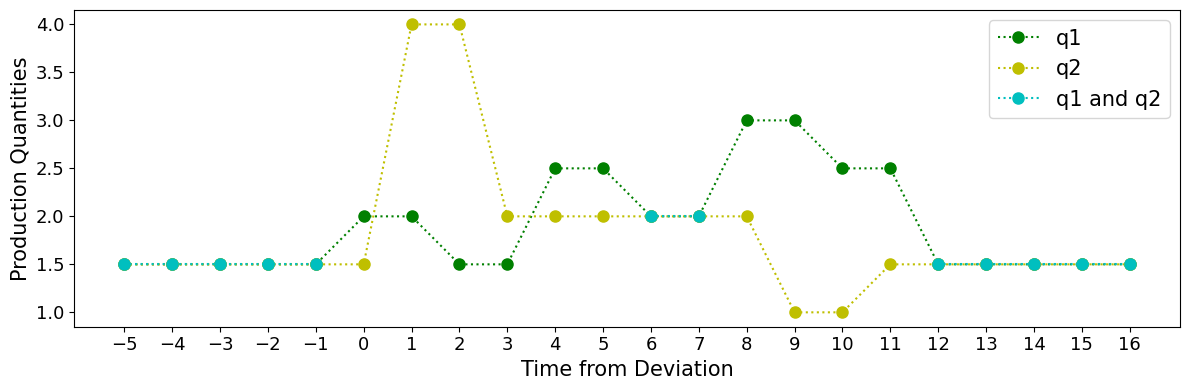

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
x=range(-5, len(q1)-5)
# plt.subplot(2, 2, 1)
plt.plot(x, q1, 'go-', linestyle='dotted', label='q1', markersize=8)
plt.plot(x, q2, 'yo-', linestyle='dotted', label='q2', markersize=8)
xx = []
yy = []
for i in range(len(q1)):
    if q1[i] == q2[i]:
        xx.append(x[i])
        yy.append(q1[i])
plt.plot(xx[:5], yy[:5], 'co-', linestyle='dotted', label="q1 and q2", markersize=8)
plt.plot(xx[5:7], yy[5:7], 'co-', linestyle='dotted', markersize=8)
plt.plot(xx[7:], yy[7:], 'co-', linestyle='dotted', markersize=8)

plt.xlabel('Time from Deviation', fontsize=15)
plt.ylabel('Production Quantities', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(range(-5, len(q1)-5), fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

C:\Users\woute\AppData\Local\Temp\ipykernel_140\1978441080.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, theta1, 'go-', linestyle='dotted', label='θ1', markersize=8)
C:\Users\woute\AppData\Local\Temp\ipykernel_140\1978441080.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "yo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, theta2, 'yo-', linestyle='dotted', label='θ2', markersize=8)
C:\Users\woute\AppData\Local\Temp\ipykernel_140\1978441080.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "co-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(xx[:5], yy[:5], 'co-', linestyle='dotted', label="θ1 and θ2", markersize=8)
C:\Users\woute\AppData\Local\Temp\ipykernel_140\197844108

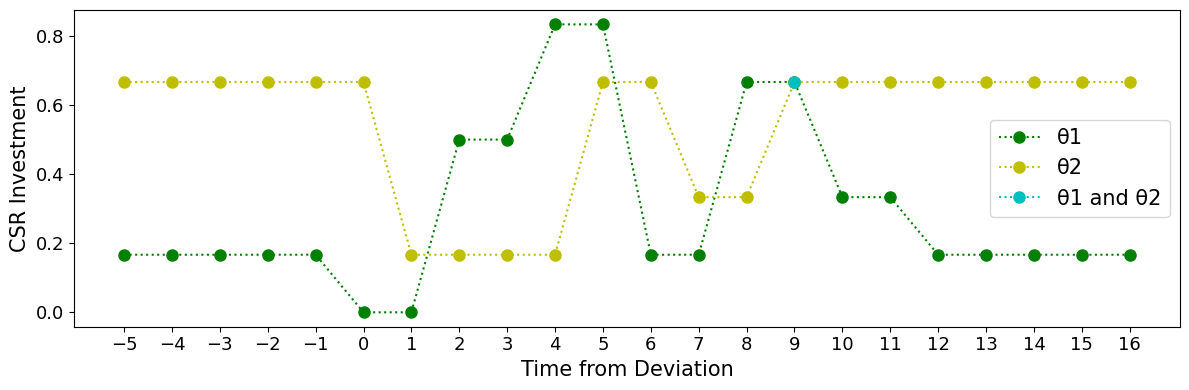

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
x=range(-5, len(q1)-5)

plt.plot(x, theta1, 'go-', linestyle='dotted', label='θ1', markersize=8)
plt.plot(x, theta2, 'yo-', linestyle='dotted', label='θ2', markersize=8)
xx = []
yy = []
for i in range(len(theta1)):
    if theta1[i] == theta2[i]:
        xx.append(x[i])
        yy.append(theta1[i])
plt.plot(xx[:5], yy[:5], 'co-', linestyle='dotted', label="θ1 and θ2", markersize=8)
plt.plot(xx[5:7], yy[5:7], 'co-', linestyle='dotted', markersize=8)
plt.plot(xx[7:], yy[7:], 'co-', linestyle='dotted', markersize=8)

plt.xlabel('Time from Deviation', fontsize=15)
plt.ylabel('CSR Investment', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(range(-5, len(q1)-5), fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

C:\Users\woute\AppData\Local\Temp\ipykernel_140\1922224911.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, pi1_ep, 'go-', linestyle='dotted', label='Π1', markersize=8)
C:\Users\woute\AppData\Local\Temp\ipykernel_140\1922224911.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "yo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, pi2_ep, 'yo-', linestyle='dotted', label='Π2', markersize=8)


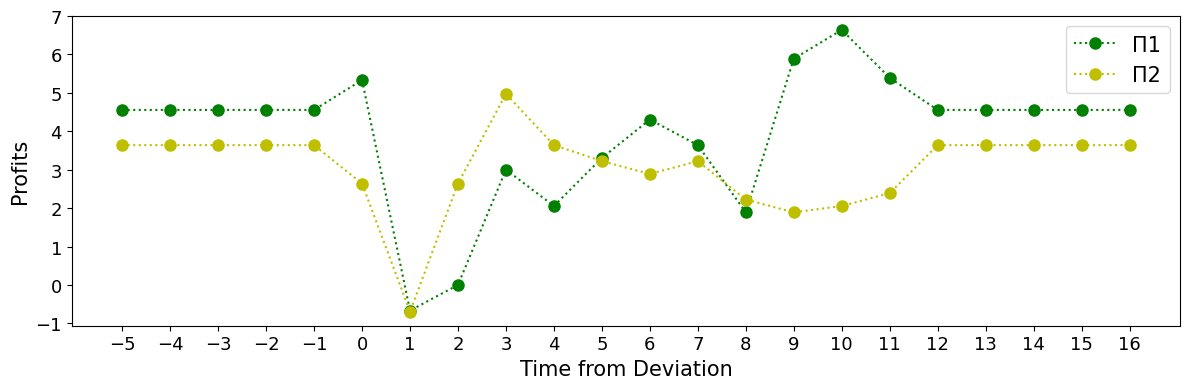

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
# plt.title("Nash Test")
x=range(-5, len(q1)-5)

plt.plot(x, pi1_ep, 'go-', linestyle='dotted', label='Π1', markersize=8)
plt.plot(x, pi2_ep, 'yo-', linestyle='dotted', label='Π2', markersize=8)

plt.xlabel('Time from Deviation', fontsize=15)
plt.ylabel('Profits', fontsize=15)
plt.legend(fontsize=15)

plt.xticks(range(-5, len(q1)-5), fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

C:\Users\woute\AppData\Local\Temp\ipykernel_140\2673484111.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, q1, 'bo-', linestyle='dotted', label='q1')
C:\Users\woute\AppData\Local\Temp\ipykernel_140\2673484111.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, q2, 'ro-', linestyle='dotted', label='q2')
C:\Users\woute\AppData\Local\Temp\ipykernel_140\2673484111.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, theta1, 'go-', linestyle='dotted', label='theta1')
C:\Users\woute\AppData\Local\Temp\ipykernel_140\2673484111.py:23: UserWarning: linestyle is redundantly defined b

ValueError: x and y must have same first dimension, but have shapes (22,) and (1,)

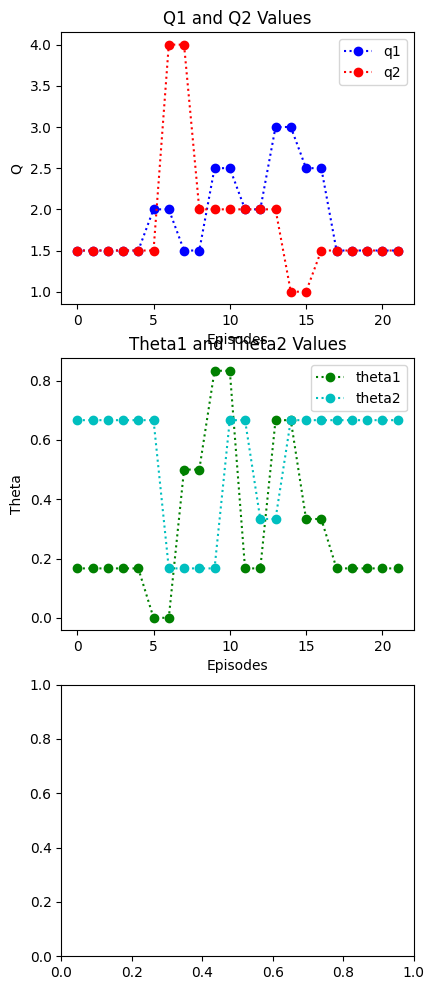

In [85]:
import matplotlib.pyplot as plt

# Assuming q1, q2, theta1, theta2, pi1, pi2 are lists

# Create a common x-axis
x = range(len(q1))

# Plotting q1 and q2
plt.figure(figsize=(10, 12))

# Plotting q1 and q2
plt.subplot(3, 2, 1)
plt.plot(x, q1, 'bo-', linestyle='dotted', label='q1')
plt.plot(x, q2, 'ro-', linestyle='dotted', label='q2')
plt.xlabel('Episodes')
plt.ylabel('Q')
plt.title('Q1 and Q2 Values')
plt.legend()

# Plotting theta1 and theta2
plt.subplot(3, 2, 3)
plt.plot(x, theta1, 'go-', linestyle='dotted', label='theta1')
plt.plot(x, theta2, 'co-', linestyle='dotted', label='theta2')
plt.xlabel('Episodes')
plt.ylabel('Theta')
plt.title('Theta1 and Theta2 Values')
plt.legend()

# Plotting pi1 and pi2
plt.subplot(3, 2, 5)
plt.plot(x, pi1, 'mo-', linestyle='dotted', label='pi1')
plt.plot(x, pi2, 'yo-', linestyle='dotted', label='pi2')
plt.xlabel('Episodes')
plt.ylabel('Pi')
plt.title('Pi1 and Pi2 Values')
plt.legend()

# Show the plot with all values on the x-axis
plt.xticks(range(len(q1)))
plt.tight_layout()
plt.show()
